In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving spark_colab_installer_drive.py to spark_colab_installer_drive.py
User uploaded file "spark_colab_installer_drive.py" with length 14696 bytes


In [2]:
exec(open('spark_colab_installer_drive.py').read())

Active services:
3744 Jps
3249 ResourceManager
3686 JobHistoryServer
3401 DataNode
3323 NameNode
3549 NodeManager

Apache Spark installed


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bank-additional-full.csv to bank-additional-full.csv
User uploaded file "bank-additional-full.csv" with length 5834924 bytes


In [4]:
import findspark
findspark.init()
import csv
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
import pandas

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("datosbancarios").getOrCreate()
df_bank = spark.read.csv('file:///content/bank-additional-full.csv',header = True, sep = ';')
print('Número de registros',df_bank.count())
df_bank.show(5)

Número de registros 41188
+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|      job|marital|  education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|  y|
+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 56|housemaid|married|   basic.4y|     no|     no|  no|telephone|  may|        mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|       5191| no|
| 57| services|married|high.school|unknown|     no|  no|telephone|  may|        mon|     149|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857| 

In [5]:
from pyspark.sql.functions import lower
simpleDF_yes = df_bank.select(df_bank['age'],df_bank['job'],df_bank['education'],df_bank['housing']).where(lower(df_bank['y']).contains('yes'))
simpleDF_yes.show(10)

+---+------------+-------------------+-------+
|age|         job|          education|housing|
+---+------------+-------------------+-------+
| 41| blue-collar|           basic.4y|    yes|
| 49|entrepreneur|  university.degree|    yes|
| 49|  technician|           basic.9y|     no|
| 41|  technician|professional.course|    yes|
| 45| blue-collar|           basic.9y|    yes|
| 42| blue-collar|           basic.9y|    yes|
| 39|   housemaid|           basic.9y|    yes|
| 28|     unknown|            unknown|    yes|
| 44|    services|        high.school|    yes|
| 42|  technician|professional.course|     no|
+---+------------+-------------------+-------+
only showing top 10 rows



In [6]:
simpleDF_no = df_bank.select(df_bank['age'],df_bank['job'],df_bank['education'],df_bank['housing']).where(lower(df_bank['y']).contains('no'))
simpleDF_no.show(10)

+---+-----------+-------------------+-------+
|age|        job|          education|housing|
+---+-----------+-------------------+-------+
| 56|  housemaid|           basic.4y|     no|
| 57|   services|        high.school|     no|
| 37|   services|        high.school|    yes|
| 40|     admin.|           basic.6y|     no|
| 56|   services|        high.school|     no|
| 45|   services|           basic.9y|     no|
| 59|     admin.|professional.course|     no|
| 41|blue-collar|            unknown|     no|
| 24| technician|professional.course|    yes|
| 25|   services|        high.school|    yes|
+---+-----------+-------------------+-------+
only showing top 10 rows



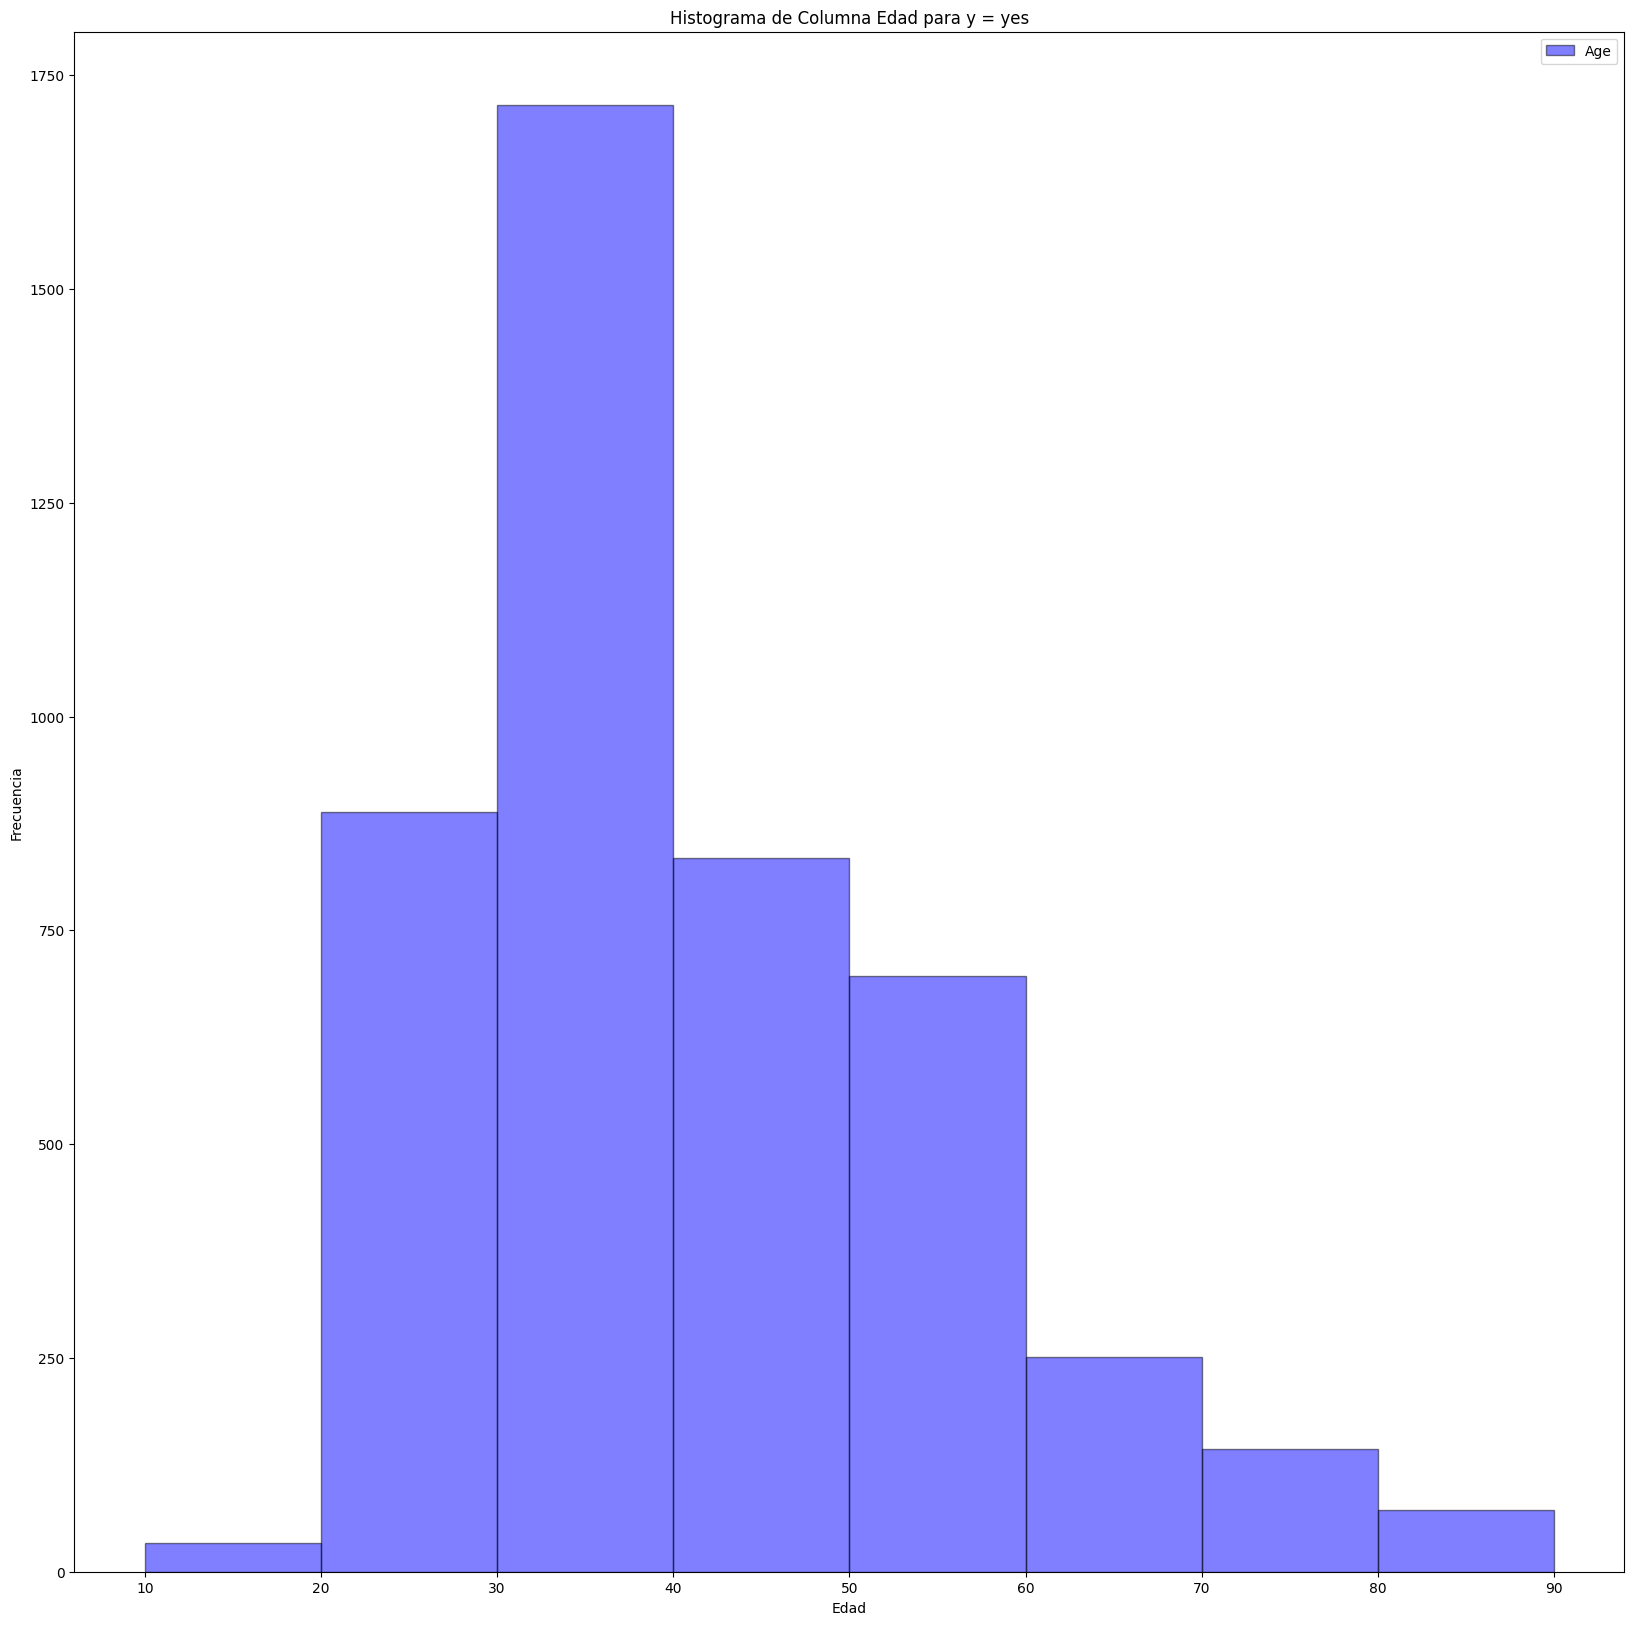

In [7]:
from pyspark.sql.types import DoubleType, IntegerType
simpleDF_yes = simpleDF_yes.withColumn('age', simpleDF_yes['age'].cast(IntegerType()))
columna1 = simpleDF_yes.select("age").rdd.flatMap(lambda x: x).collect()
plt.figure(figsize=(20, 20)) 
plt.hist(columna1, bins=range(10, 100, 10), color='blue', edgecolor='black', alpha=0.5, label="Age")  # Histograma para columna1

plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de Columna Edad para y = yes")
plt.legend()  # Agregar leyenda
plt.show()



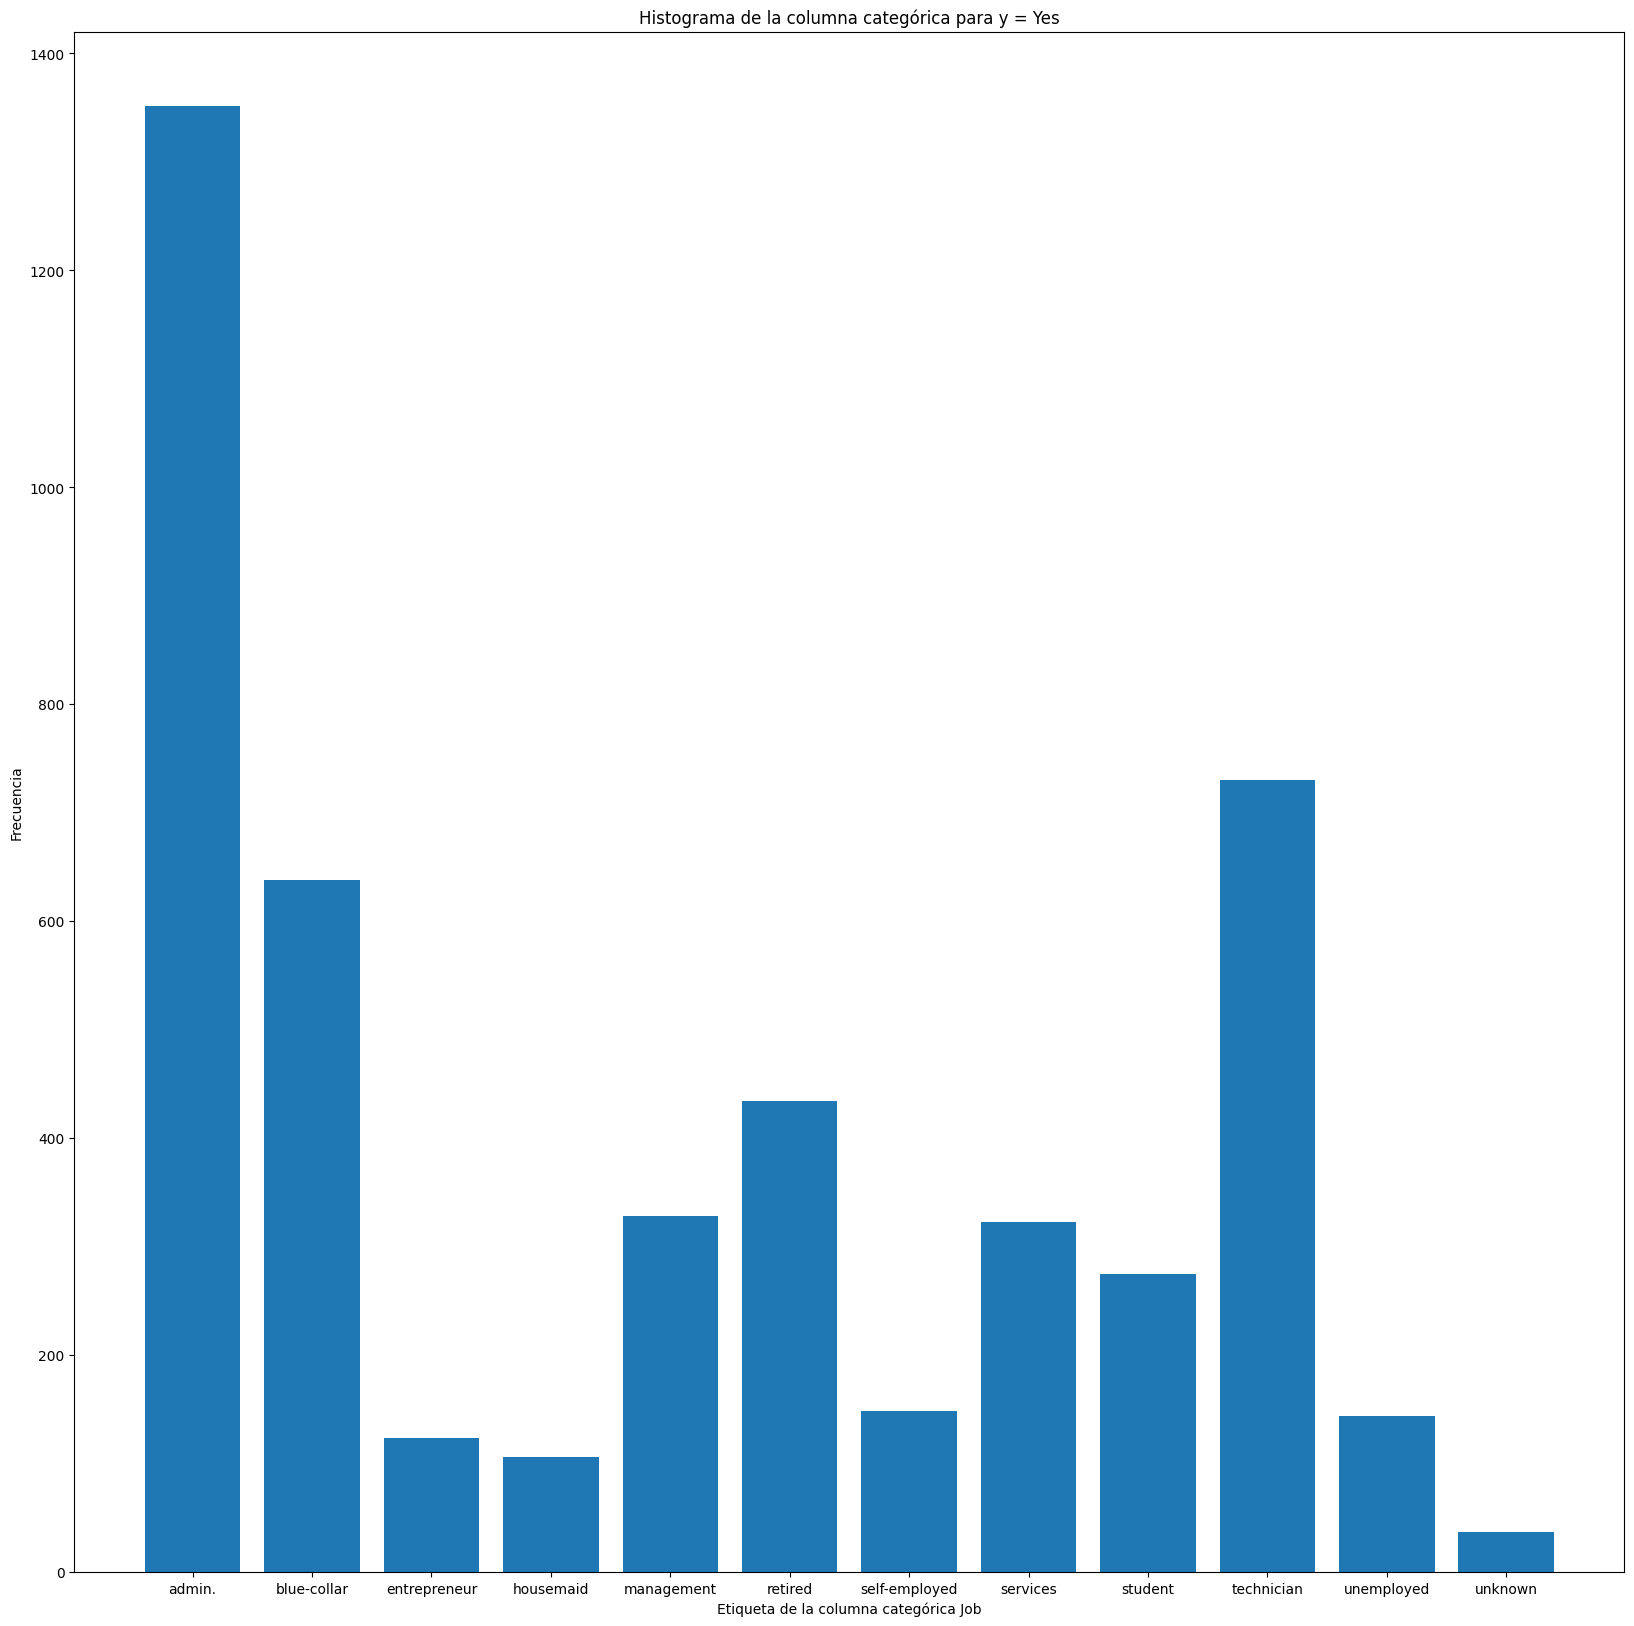

In [8]:
conteo = simpleDF_yes.groupBy("job").count().orderBy("job")
conteo_pd = conteo.toPandas()
# Extrae los datos de la columna 'count' como los valores del histograma
valores = conteo_pd["count"].values

# Extrae las etiquetas de la columna categórica como las etiquetas del eje x
etiquetas = conteo_pd["job"].values

# Crea el histograma
plt.figure(figsize=(20, 20)) 
plt.bar(etiquetas, valores)
plt.xlabel("Etiqueta de la columna categórica Job")
plt.ylabel("Frecuencia")
plt.title("Histograma de la columna categórica para y = Yes")
plt.show()

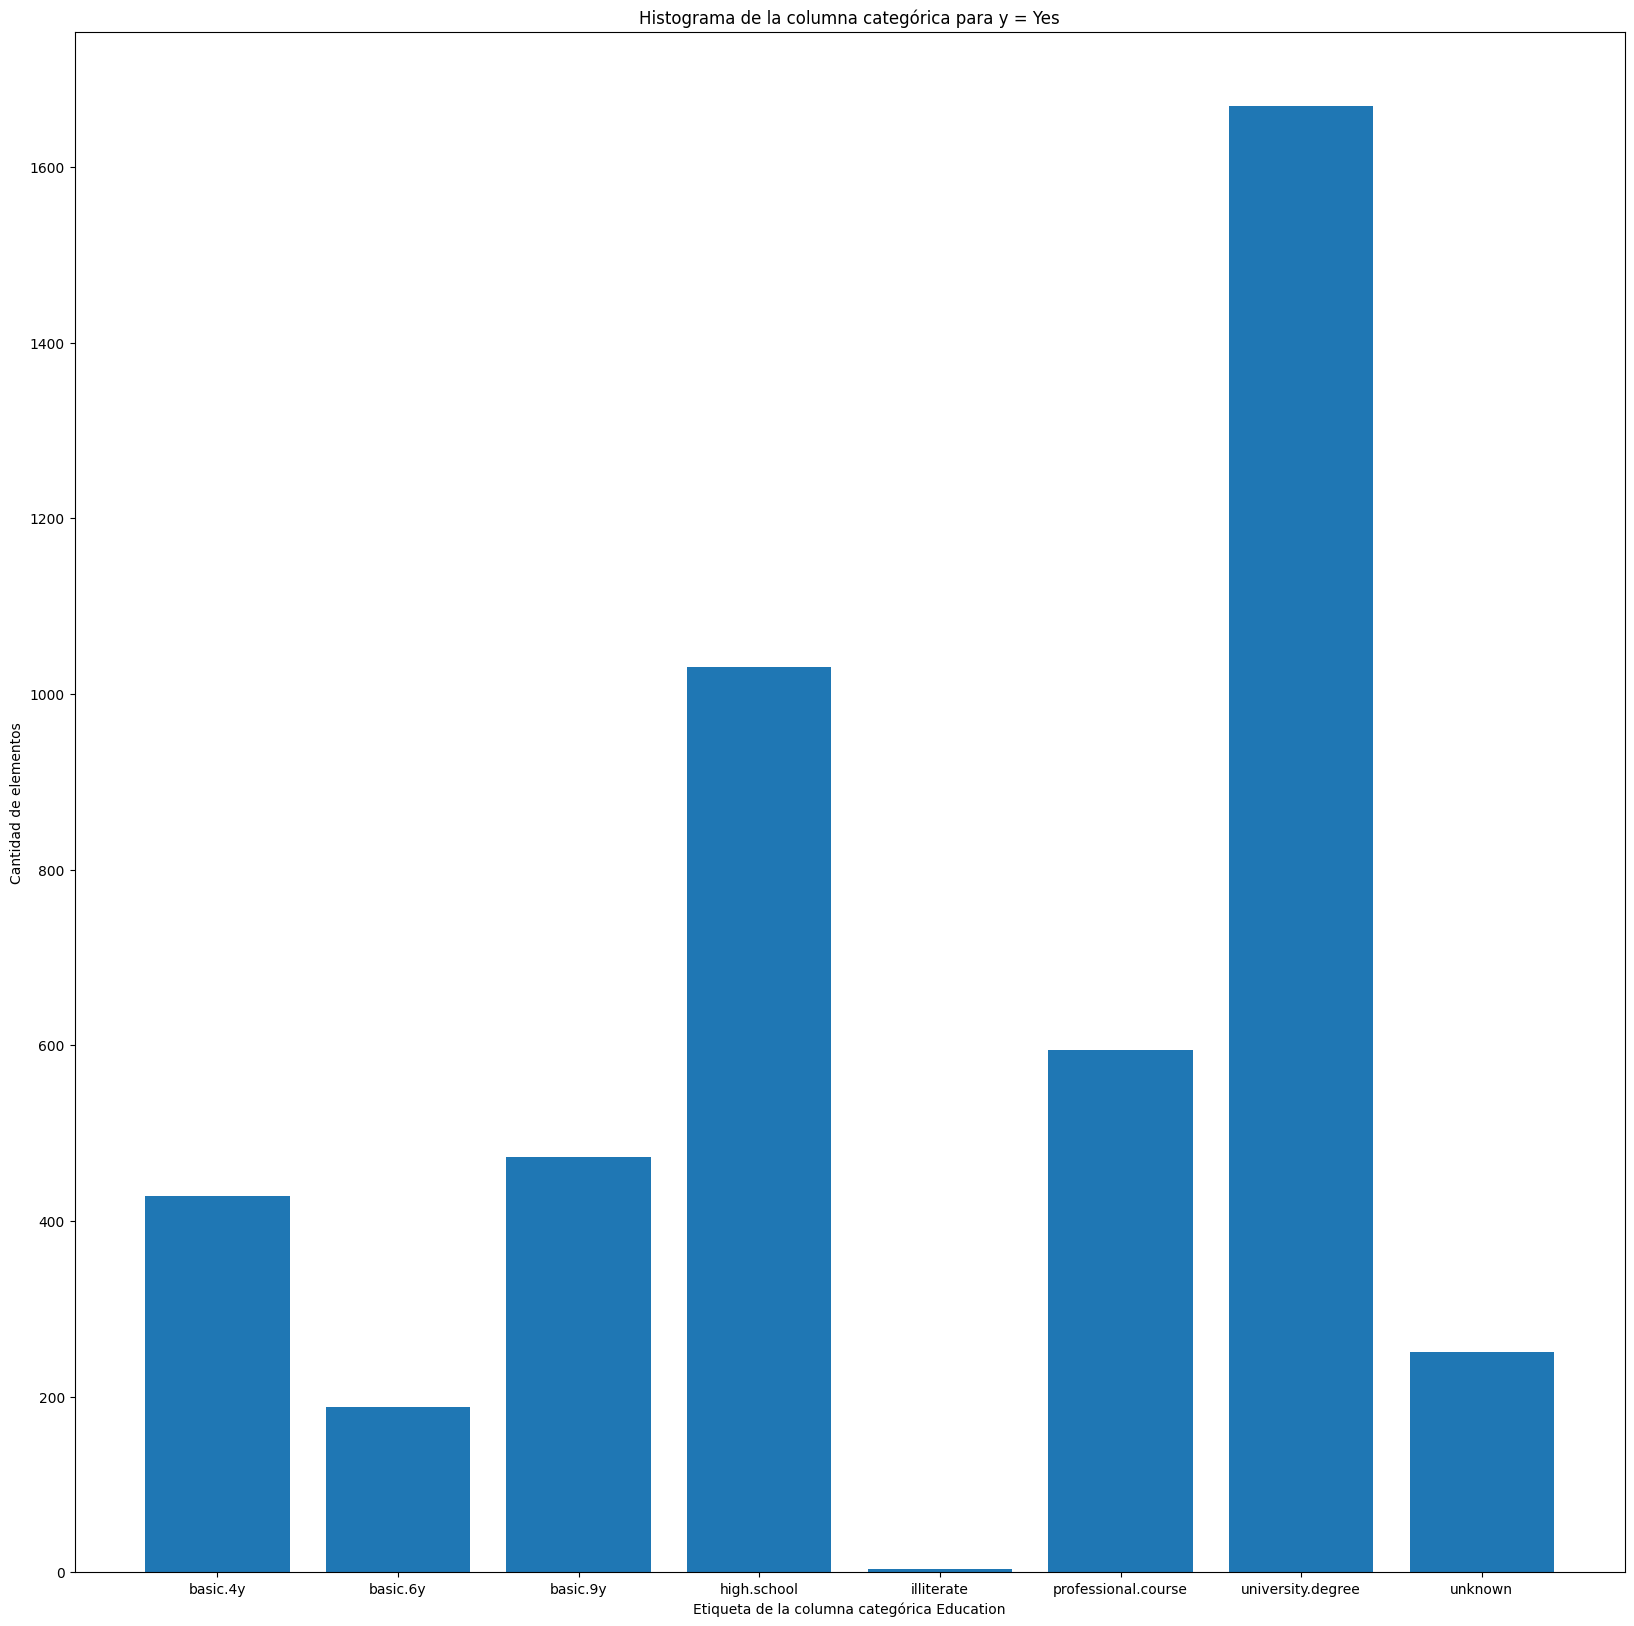

In [9]:

conteo = simpleDF_yes.groupBy("education").count().orderBy("education")
conteo_pd = conteo.toPandas()
# Extrae los datos de la columna 'count' como los valores del histograma
valores = conteo_pd["count"].values

# Extrae las etiquetas de la columna categórica como las etiquetas del eje x
etiquetas = conteo_pd["education"].values

# Crea el histograma
plt.figure(figsize=(20, 20)) 
plt.bar(etiquetas, valores)
plt.xlabel("Etiqueta de la columna categórica Education")
plt.ylabel("Cantidad de elementos")
plt.title("Histograma de la columna categórica para y = Yes")
plt.show()

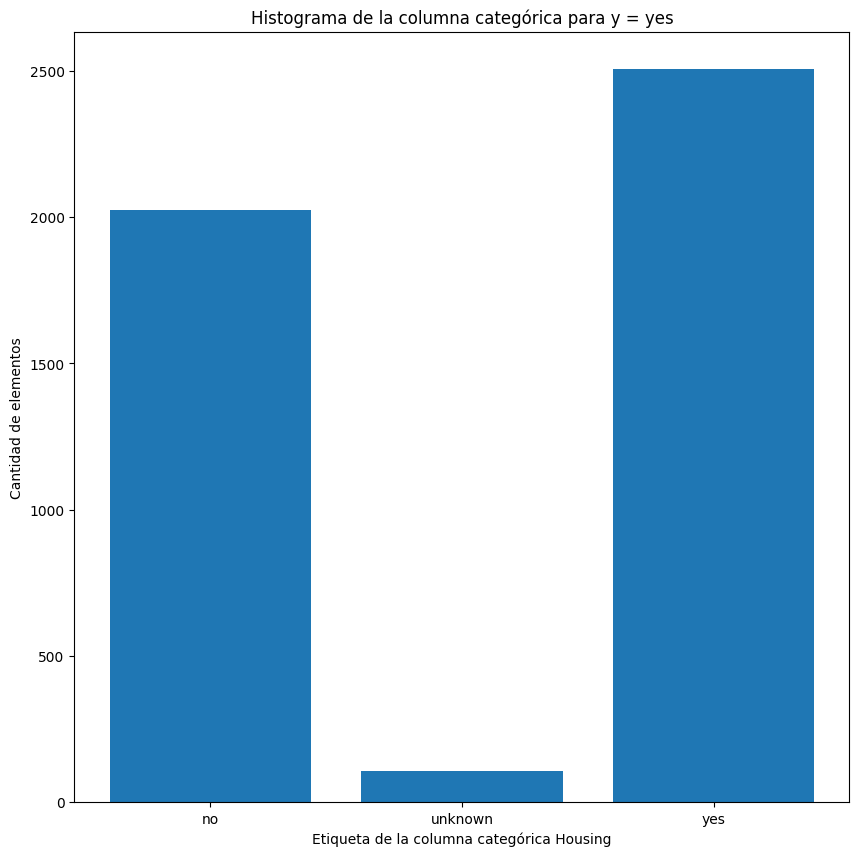

In [10]:

conteo = simpleDF_yes.groupBy("housing").count().orderBy("housing")
conteo_pd = conteo.toPandas()
# Extrae los datos de la columna 'count' como los valores del histograma
valores = conteo_pd["count"].values

# Extrae las etiquetas de la columna categórica como las etiquetas del eje x
etiquetas = conteo_pd["housing"].values

# Crea el histograma
plt.figure(figsize=(10, 10)) 
plt.bar(etiquetas, valores)
plt.xlabel("Etiqueta de la columna categórica Housing")
plt.ylabel("Cantidad de elementos")
plt.title("Histograma de la columna categórica para y = yes")
plt.show()

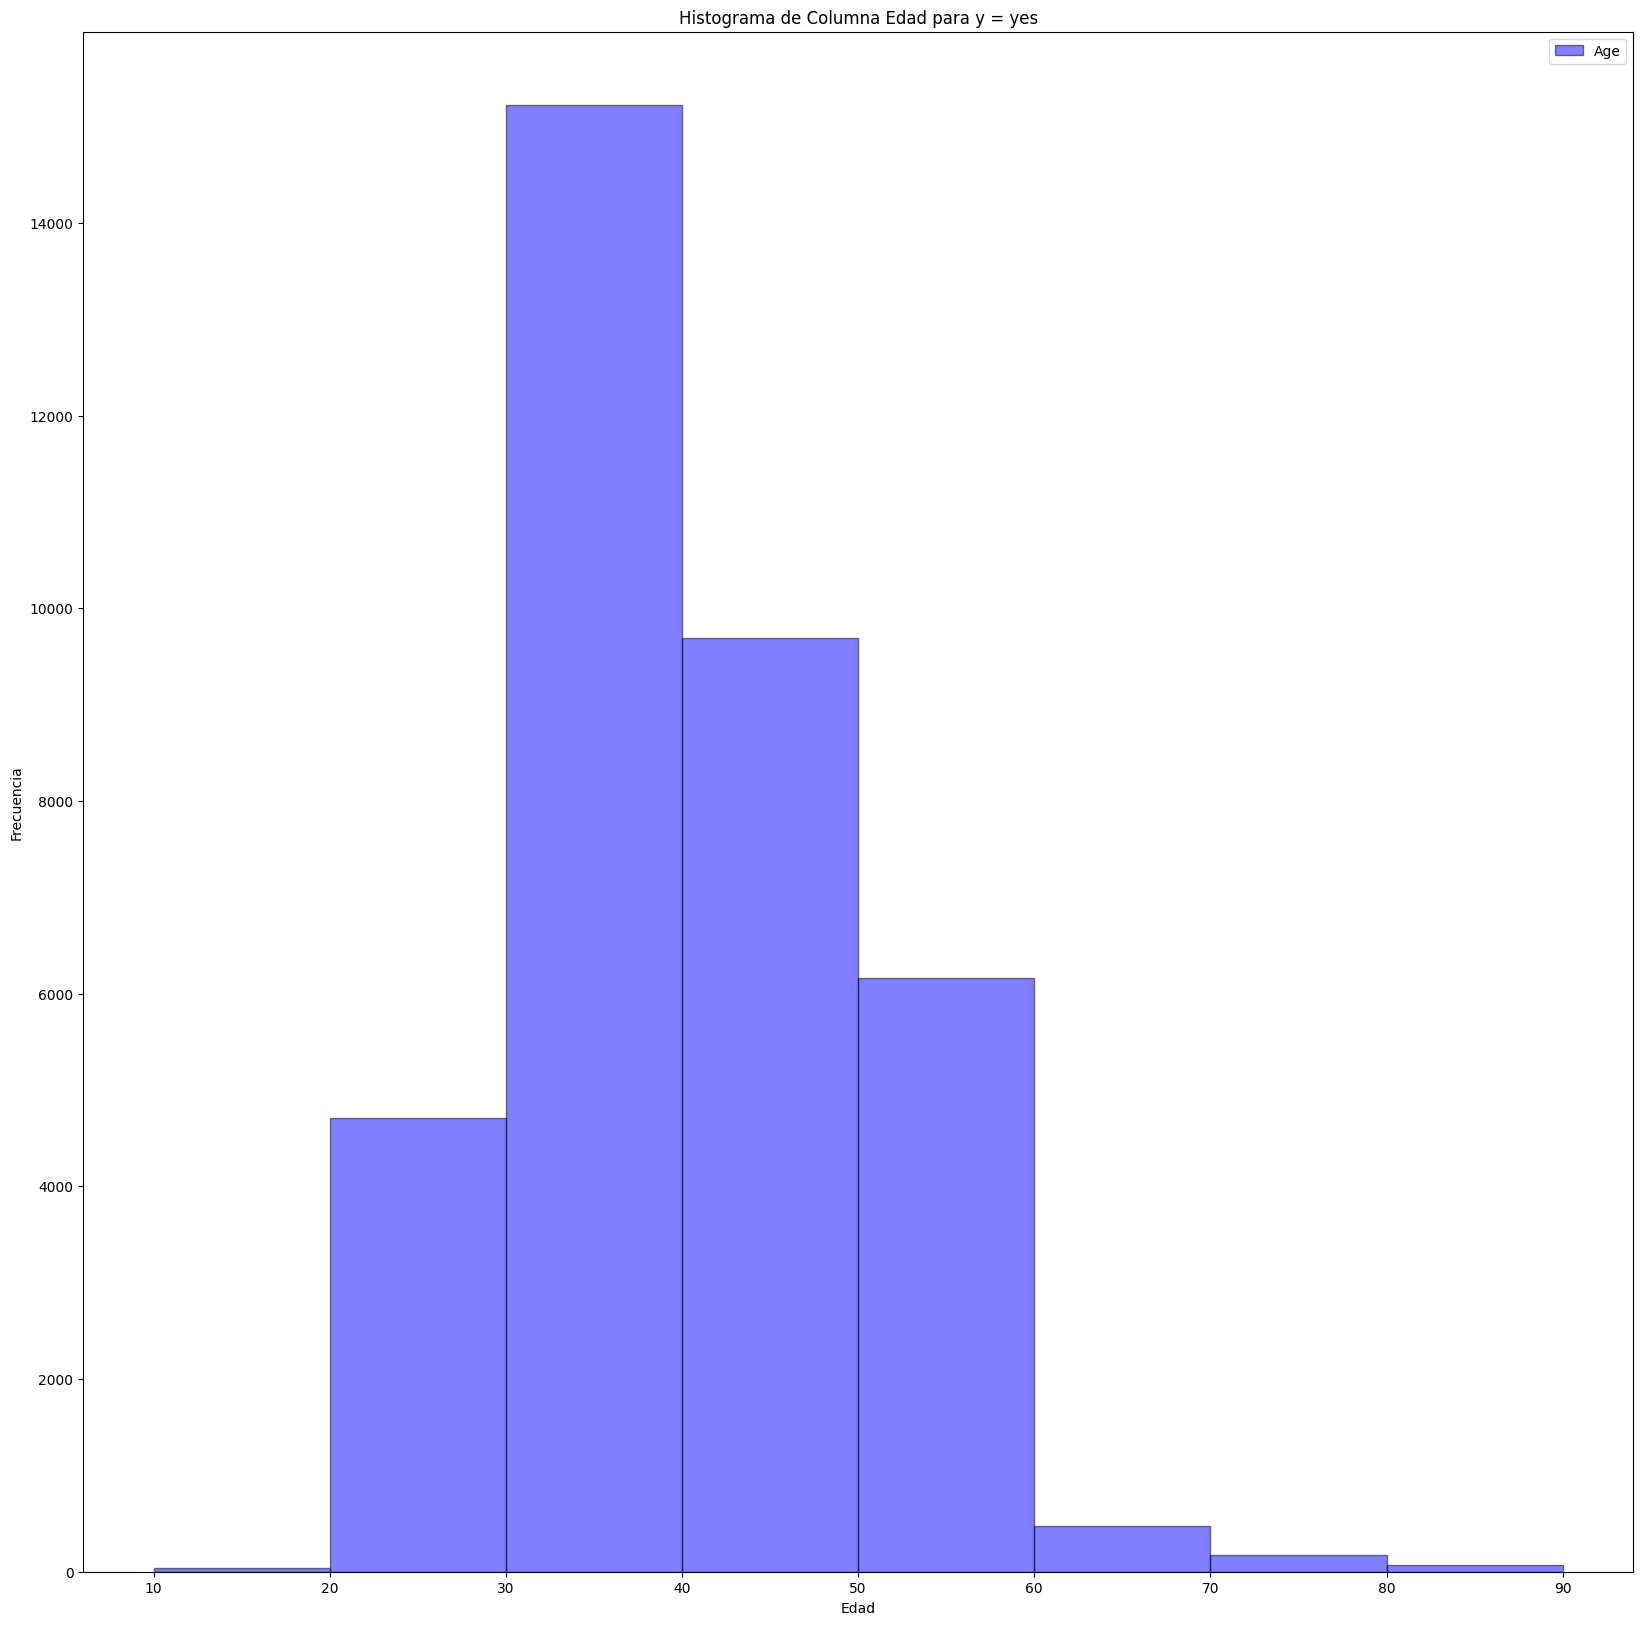

In [11]:
simpleDF_no = simpleDF_no.withColumn('age', simpleDF_no['age'].cast(IntegerType()))
columna1 = simpleDF_no.select("age").rdd.flatMap(lambda x: x).collect()
plt.figure(figsize=(20, 20)) 
plt.hist(columna1, bins=range(10, 100, 10), color='blue', edgecolor='black', alpha=0.5, label="Age")  # Histograma para columna1

plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de Columna Edad para y = yes")
plt.legend()  # Agregar leyenda
plt.show()

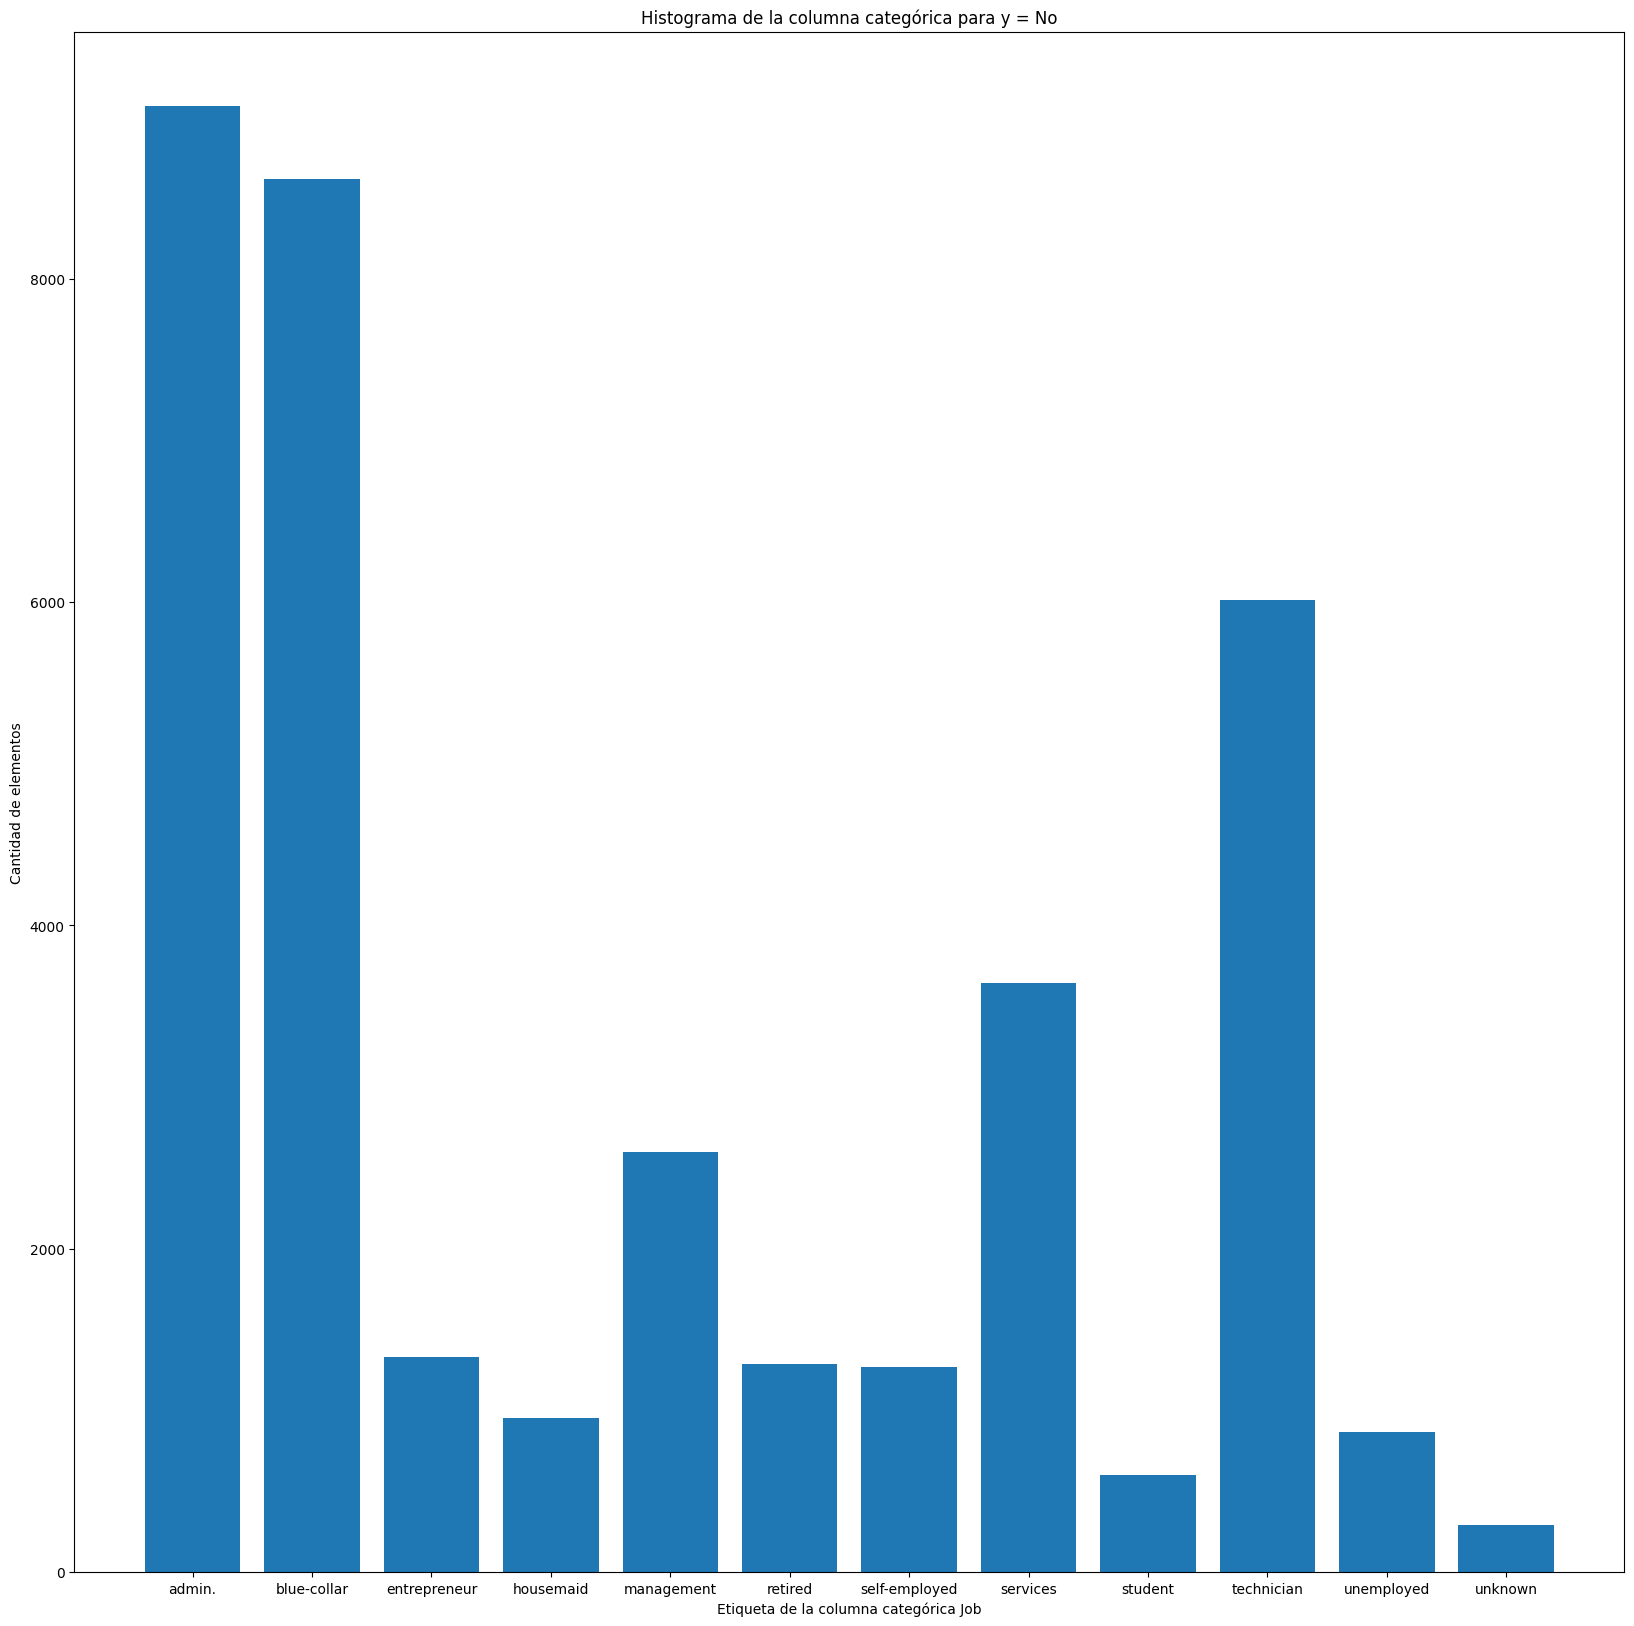

In [12]:
conteo1 = simpleDF_no.groupBy("job").count().orderBy("job")
conteo_pd1 = conteo1.toPandas()
# Extrae los datos de la columna 'count' como los valores del histograma
valores1 = conteo_pd1["count"].values

# Extrae las etiquetas de la columna categórica como las etiquetas del eje x
etiquetas1 = conteo_pd1["job"].values

# Crea el histograma
plt.figure(figsize=(20, 20)) 
plt.bar(etiquetas1, valores1)
plt.xlabel("Etiqueta de la columna categórica Job")
plt.ylabel("Cantidad de elementos")
plt.title("Histograma de la columna categórica para y = No")
plt.show()

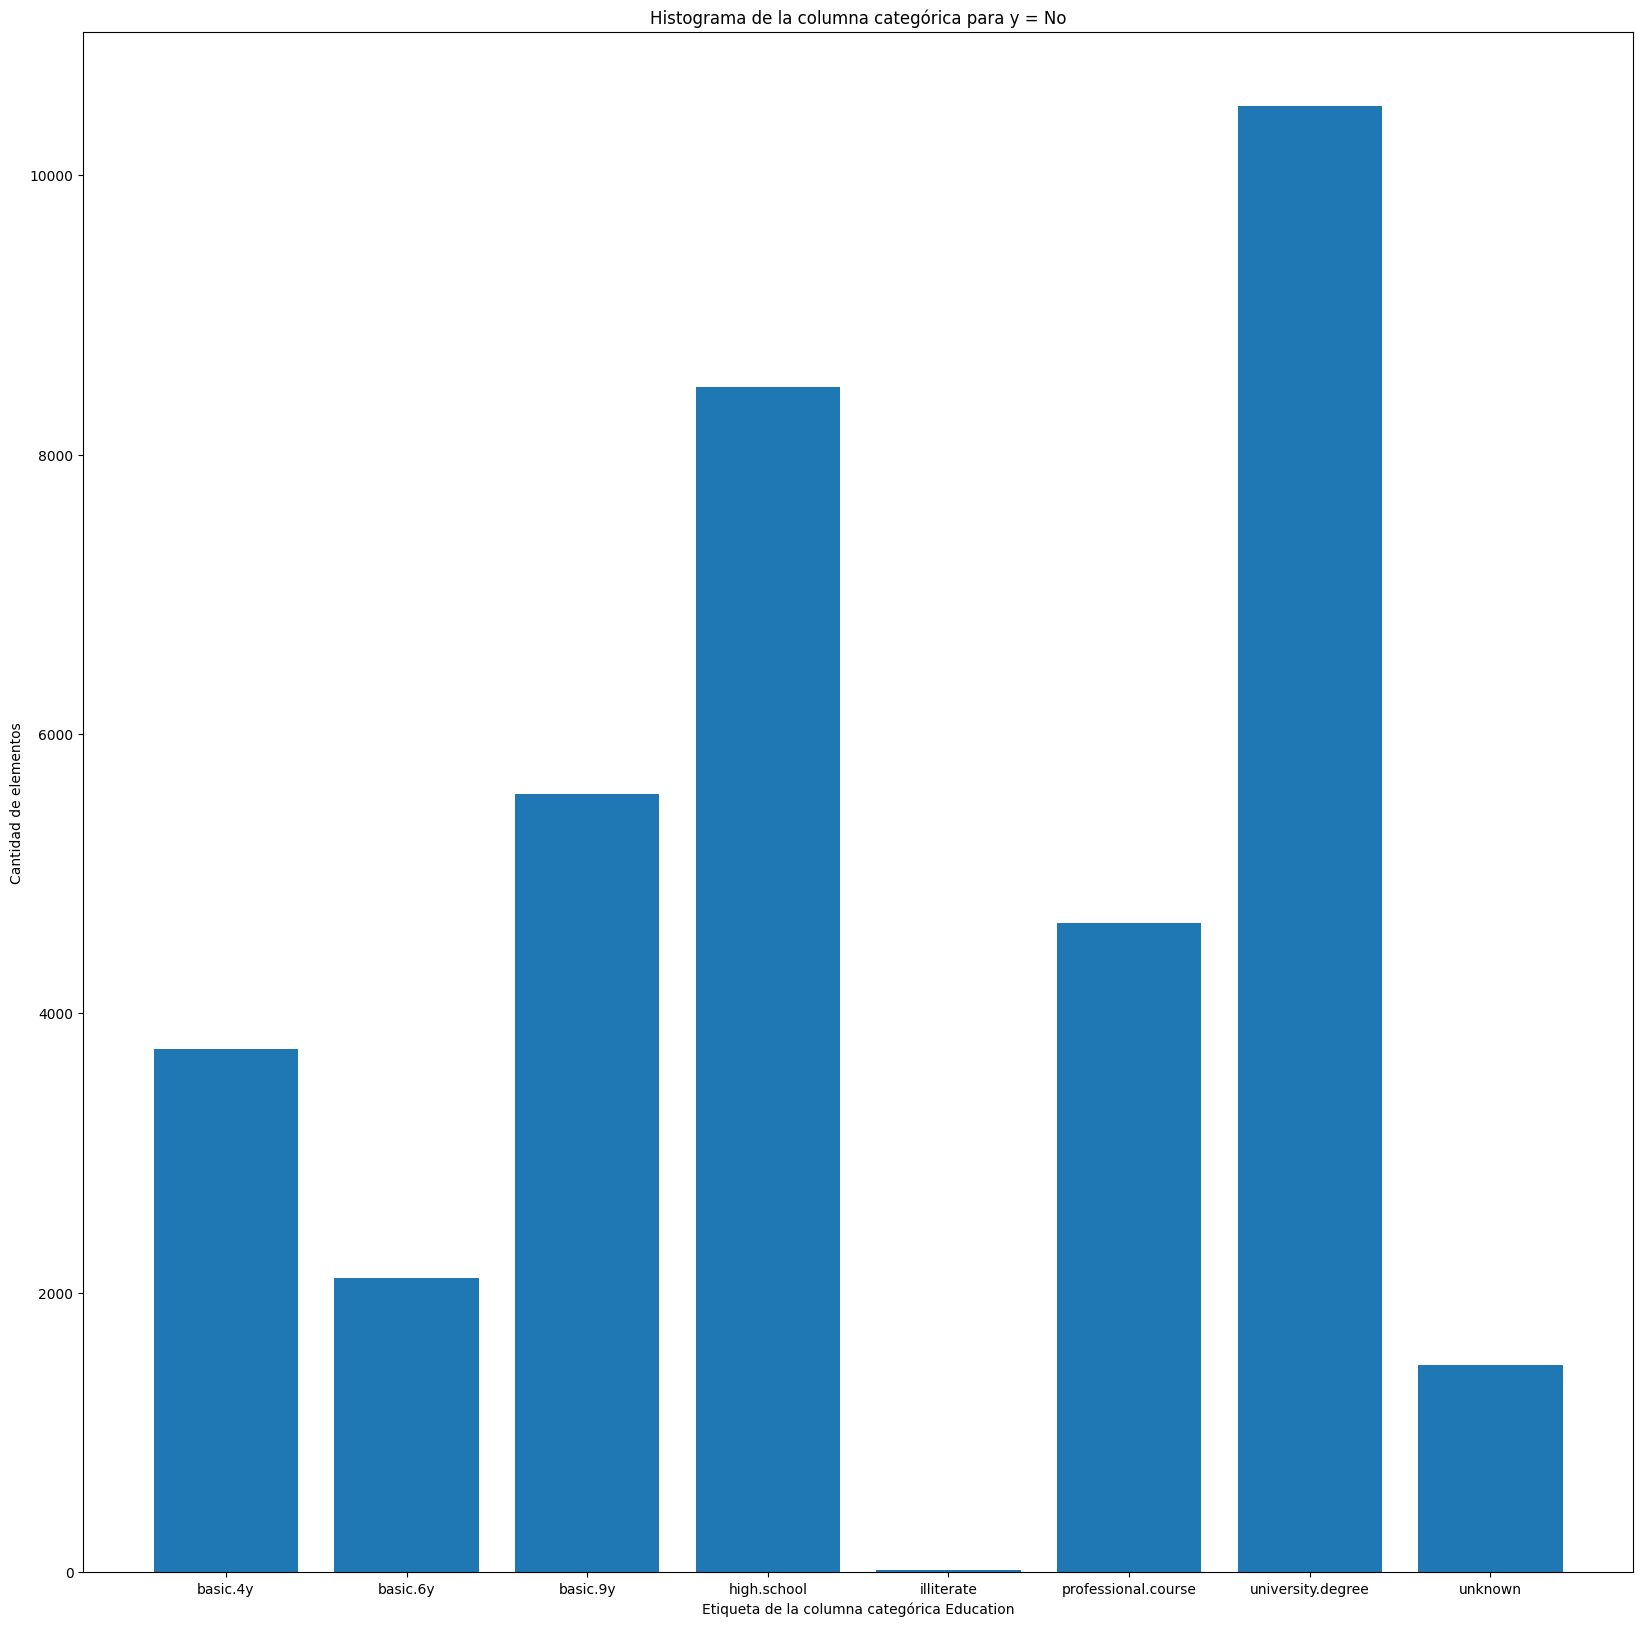

In [13]:
conteo1 = simpleDF_no.groupBy("education").count().orderBy("education")
conteo_pd1 = conteo1.toPandas()
# Extrae los datos de la columna 'count' como los valores del histograma
valores1 = conteo_pd1["count"].values

# Extrae las etiquetas de la columna categórica como las etiquetas del eje x
etiquetas1 = conteo_pd1["education"].values

# Crea el histograma
plt.figure(figsize=(20, 20)) 
plt.bar(etiquetas1, valores1)
plt.xlabel("Etiqueta de la columna categórica Education")
plt.ylabel("Cantidad de elementos")
plt.title("Histograma de la columna categórica para y = No")
plt.show()

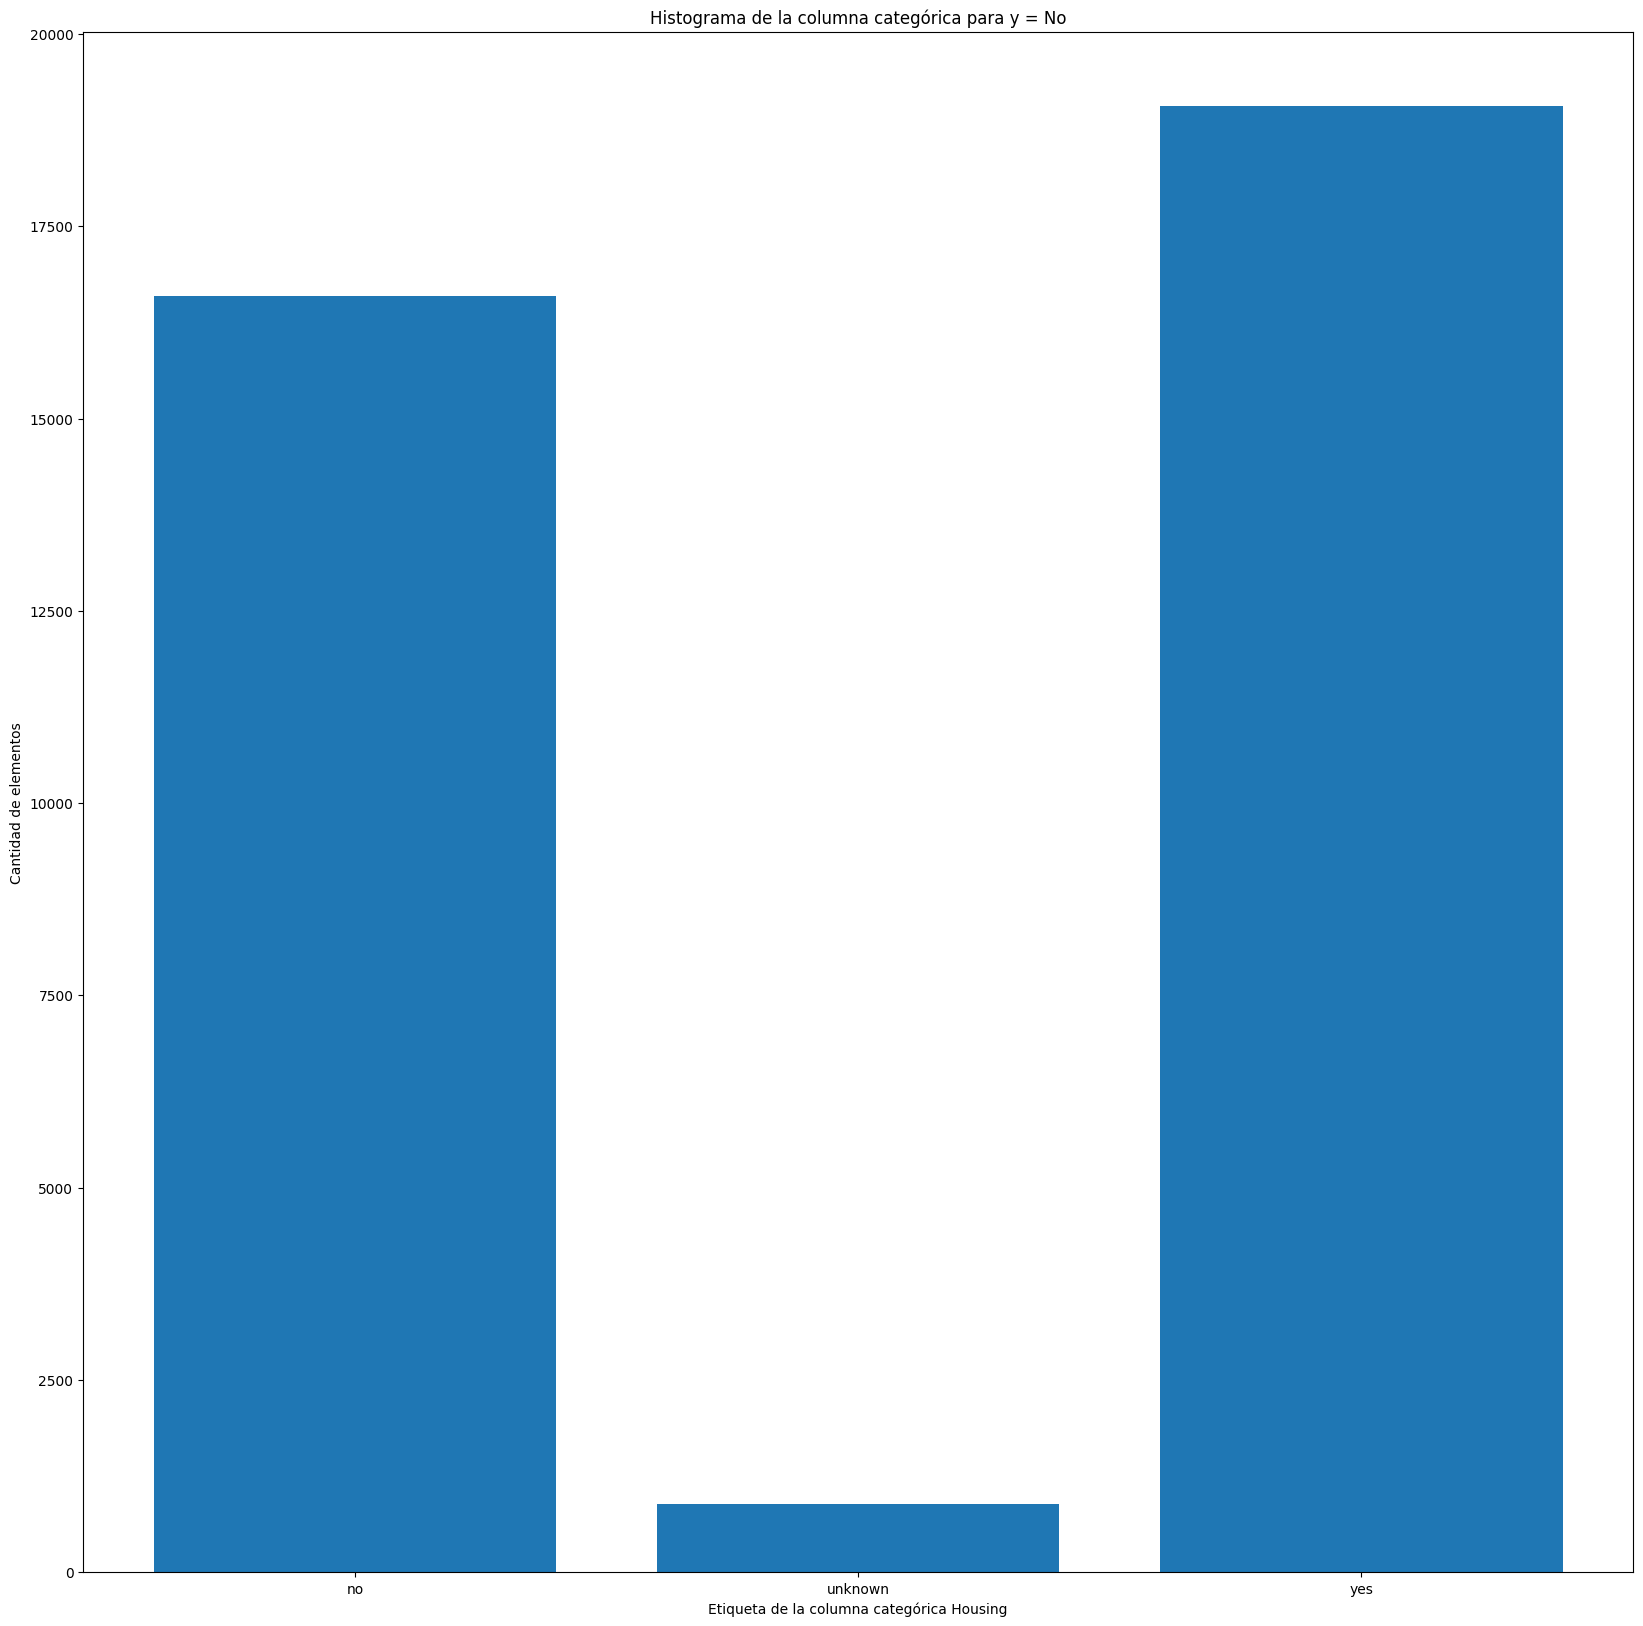

In [14]:
conteo1 = simpleDF_no.groupBy("housing").count().orderBy("housing")
conteo_pd1 = conteo1.toPandas()
# Extrae los datos de la columna 'count' como los valores del histograma
valores1 = conteo_pd1["count"].values

# Extrae las etiquetas de la columna categórica como las etiquetas del eje x
etiquetas1 = conteo_pd1["housing"].values

# Crea el histograma
plt.figure(figsize=(20, 20)) 
plt.bar(etiquetas1, valores1)
plt.xlabel("Etiqueta de la columna categórica Housing")
plt.ylabel("Cantidad de elementos")
plt.title("Histograma de la columna categórica para y = No")
plt.show()

In [15]:
simpleDF_yes.createOrReplaceTempView("temporal")
countsDF = spark.sql("SELECT job, education, COUNT(*) AS count \
                      FROM temporal \
                      GROUP BY job, education \
                      ORDER BY count DESC")

# Mostrar los primeros 20 registros de la tabla resultante
countsDF.show(20)

+-------------+-------------------+-----+
|          job|          education|count|
+-------------+-------------------+-----+
|       admin.|  university.degree|  823|
|       admin.|        high.school|  382|
|   technician|professional.course|  343|
|   management|  university.degree|  257|
|  blue-collar|           basic.9y|  240|
|   technician|  university.degree|  225|
|     services|        high.school|  203|
|      retired|           basic.4y|  185|
|  blue-collar|           basic.4y|  123|
|      student|        high.school|  114|
|  blue-collar|           basic.6y|  107|
|self-employed|  university.degree|   96|
|  blue-collar|        high.school|   94|
|   technician|        high.school|   85|
|      retired|  university.degree|   66|
| entrepreneur|  university.degree|   66|
|      retired|        high.school|   62|
|      student|            unknown|   59|
|      retired|professional.course|   57|
|    housemaid|           basic.4y|   51|
+-------------+-------------------

In [16]:
countsDF.write.format("json").save("countsDF.json")
simpleDF_yes.write.format("json").save("simpleDF_yes.json")
simpleDF_no.write.format("json").save("simpleDF_no.json")

In [17]:
!hdfs dfs -ls countsDF.json
!hdfs dfs -ls simpleDF_yes.json
!hdfs dfs -ls simpleDF_no.json

Found 2 items
-rw-r--r--   1 root supergroup          0 2023-04-25 17:00 countsDF.json/_SUCCESS
-rw-r--r--   1 root supergroup       4968 2023-04-25 17:00 countsDF.json/part-00000-1825ca9e-f4c8-4798-b21b-3aafc393da79-c000.json
Found 3 items
-rw-r--r--   1 root supergroup          0 2023-04-25 17:00 simpleDF_yes.json/_SUCCESS
-rw-r--r--   1 root supergroup     166666 2023-04-25 17:00 simpleDF_yes.json/part-00000-aa463d8a-f18a-49c9-ade8-91b5e27f7337-c000.json
-rw-r--r--   1 root supergroup     169256 2023-04-25 17:00 simpleDF_yes.json/part-00001-aa463d8a-f18a-49c9-ade8-91b5e27f7337-c000.json
Found 3 items
-rw-r--r--   1 root supergroup          0 2023-04-25 17:00 simpleDF_no.json/_SUCCESS
-rw-r--r--   1 root supergroup    2388360 2023-04-25 17:00 simpleDF_no.json/part-00000-bc3e1308-7cb0-447c-8ebc-c904581fae7c-c000.json
-rw-r--r--   1 root supergroup     254031 2023-04-25 17:00 simpleDF_no.json/part-00001-bc3e1308-7cb0-447c-8ebc-c904581fae7c-c000.json


In [18]:
bank = spark.sparkContext.textFile('file:///content/bank-additional-full.csv').map(lambda line: line.split(";"))
rdd_filtered = bank.filter(lambda x: "yes" in x[20])
rdd = rdd_filtered.map(lambda columns: ((columns[1], columns[3]), 1))
rdd = rdd.reduceByKey(lambda a, b: a + b)
rdd = rdd.sortBy(lambda x: x[1], ascending=False)
results = rdd.take(20)
for result in results:
    print(list(result[0]), result[1])

['"admin."', '"university.degree"'] 823
['"admin."', '"high.school"'] 382
['"technician"', '"professional.course"'] 343
['"management"', '"university.degree"'] 257
['"blue-collar"', '"basic.9y"'] 240
['"technician"', '"university.degree"'] 225
['"services"', '"high.school"'] 203
['"retired"', '"basic.4y"'] 185
['"blue-collar"', '"basic.4y"'] 123
['"student"', '"high.school"'] 114
['"blue-collar"', '"basic.6y"'] 107
['"self-employed"', '"university.degree"'] 96
['"blue-collar"', '"high.school"'] 94
['"technician"', '"high.school"'] 85
['"entrepreneur"', '"university.degree"'] 66
['"retired"', '"university.degree"'] 66
['"retired"', '"high.school"'] 62
['"student"', '"unknown"'] 59
['"retired"', '"professional.course"'] 57
['"housemaid"', '"basic.4y"'] 51
